### Smiles and RDKit Mol Objects

In [1]:
#Using Rdkit's MolFromSmiles

In [1]:
import pandas as pd
from rdkit import Chem

In [2]:
delaney_url = 'delaney_solubility1.csv'
df = pd.read_csv(delaney_url, delimiter=',')
df

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [3]:
df1 = df.drop(['Compound ID', 'measured log(solubility:mol/L)', 'ESOL predicted log(solubility:mol/L)'], axis = 1)

In [4]:
df1.head()

,SMILES
0,ClCC(Cl)(Cl)Cl
1,CC(Cl)(Cl)Cl
2,ClC(Cl)C(Cl)Cl
3,ClCC(Cl)Cl
4,FC(F)(Cl)C(F)(Cl)Cl


### Chem.MolFromSmiles

In [5]:
mol = []
for x in df.SMILES:
    molo = Chem.MolFromSmiles(x)
    mol.append(molo)
df1['mol'] = mol

In [6]:
df1.head()

,SMILES,mol
0,ClCC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x128201460>
1,CC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x1282014d0>
2,ClC(Cl)C(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x128201540>
3,ClCC(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x1282015b0>
4,FC(F)(Cl)C(F)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x128201620>


### Chem.MolToSmiles

In [7]:
newsmiles = [Chem.MolToSmiles(x) for x in df1['mol']]

In [8]:
df1['NewSMILES'] = newsmiles #NewSMILES is from MolToSmiles. You can see Smiles and NewSMILES give the same Value.

In [9]:
df1.head()

,SMILES,mol,NewSMILES
0,ClCC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x128201460>,ClCC(Cl)(Cl)Cl
1,CC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x1282014d0>,CC(Cl)(Cl)Cl
2,ClC(Cl)C(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x128201540>,ClC(Cl)C(Cl)Cl
3,ClCC(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x1282015b0>,ClCC(Cl)Cl
4,FC(F)(Cl)C(F)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x128201620>,FC(F)(Cl)C(F)(Cl)Cl


### PandasTools.Gene

In [10]:
#Another way to generate mol objects - Use PandasTools!

In [11]:
from rdkit.Chem import PandasTools

In [12]:
df.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


In [13]:
df2 = df.drop(['Compound ID', 'measured log(solubility:mol/L)', 'ESOL predicted log(solubility:mol/L)'], axis = 1)

In [15]:
df2.head()

,SMILES
0,ClCC(Cl)(Cl)Cl
1,CC(Cl)(Cl)Cl
2,ClC(Cl)C(Cl)Cl
3,ClCC(Cl)Cl
4,FC(F)(Cl)C(F)(Cl)Cl


In [16]:
PandasTools.AddMoleculeColumnToFrame(df2, 'SMILES', 'mol')

,SMILES,mol
0,ClCC(Cl)(Cl)Cl,
1,CC(Cl)(Cl)Cl,
2,ClC(Cl)C(Cl)Cl,
3,ClCC(Cl)Cl,
4,FC(F)(Cl)C(F)(Cl)Cl,
...,...,...
1139,CNC(=O)C(C)SCCSP(=O)(OC)(OC),
1140,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C,
1141,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O,
1142,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O,

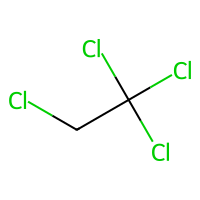
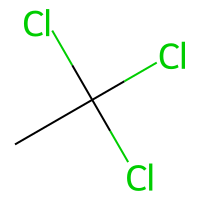
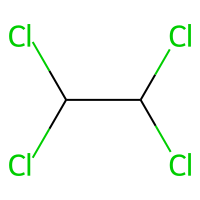
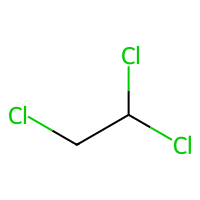
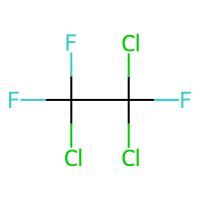
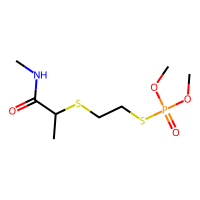
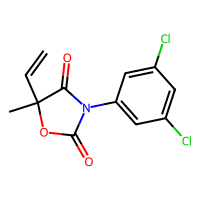
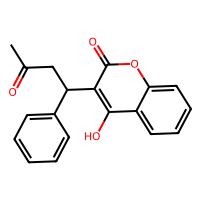
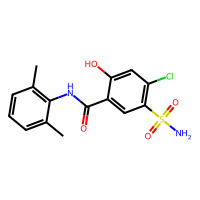
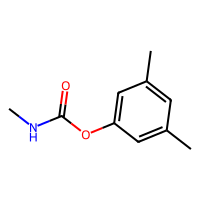

In [17]:
df2